/var/folders/k6/gg0yxj7x0tg9nllqx2xkm2rw0000gn/T/ipykernel_20148/2769757356.py:5: DeprecationWarning: Please use `uniform_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import uniform_filter1d


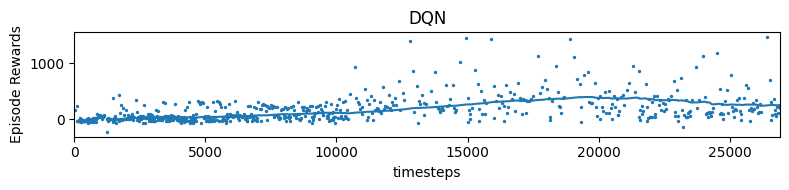

In [8]:
from stable_baselines3.common import results_plotter
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
import matplotlib.pyplot as plt 
import numpy as np
from scipy.ndimage.filters import uniform_filter1d

log_dir = "figures/models/"
timesteps = 30000
plot_results([log_dir], timesteps, results_plotter.X_TIMESTEPS, "DQN")

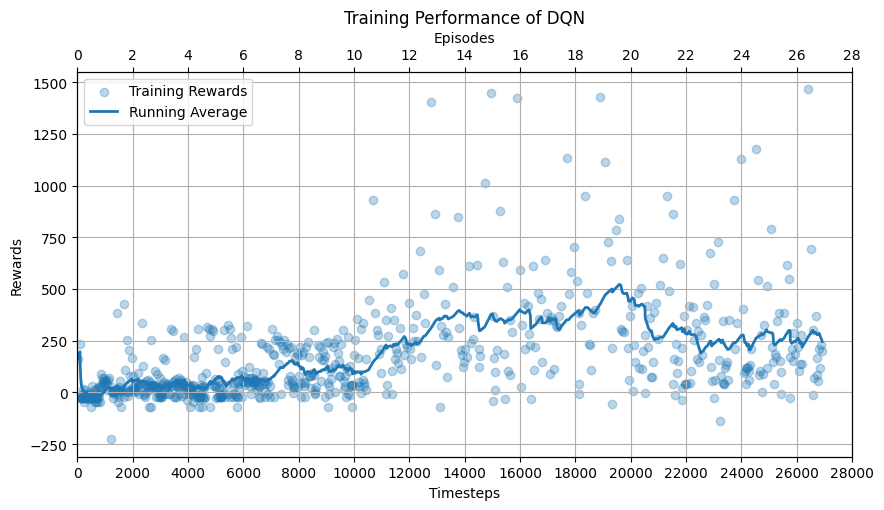

In [20]:
timesteps = 28000

# Load results
results = load_results(log_dir)
x, y = ts2xy(results, 'timesteps')

# Filter out data points beyond the specified timesteps
mask = x <= timesteps
x, y = x[mask], y[mask]

# Calculate running average
window_size = 25  # Adjust the window size for smoothing

# Initialize the running average array
y_avg = np.zeros_like(y, dtype=float)
for i in range(len(y)):
    y_avg[i] = np.mean(y[max(0, i - window_size + 1):i + 1])

# Plotting the results
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot training rewards and running average on the primary x-axis
ax1.scatter(x, y, alpha=0.3, label='Training Rewards')
ax1.plot(x, y_avg, c='#1f77b4', label='Running Average', linewidth=2)

# Set primary x-axis ticks and limits
ax1.set_xticks(np.arange(0, timesteps + 1, 2000))
ax1.set_xlim(0, timesteps)
ax1.set_xlabel('Timesteps')
ax1.set_ylabel('Rewards')
ax1.set_title('Training Performance of DQN')

# Add a secondary x-axis for episode numbers
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(ax1.get_xticks())
ax2.set_xticklabels((ax1.get_xticks() / 1000).astype(int))
ax2.set_xlabel('Episodes')

# Add legends and grid
ax1.legend(loc='upper left')
ax1.grid(True)

plt.show()

In [2]:
import re

# The input string with multiple blocks of data
s = '''
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.5     |
|    ep_rew_mean      | 86       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 0        |
|    time_elapsed     | 141      |
|    total_timesteps  | 122      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.8     |
|    n_updates        | 5        |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 29       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 0        |
|    time_elapsed     | 189      |
|    total_timesteps  | 162      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.7     |
|    n_updates        | 15       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 11.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12       |
|    fps              | 0        |
|    time_elapsed     | 240      |
|    total_timesteps  | 205      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.2     |
|    n_updates        | 26       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 4.38     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16       |
|    fps              | 0        |
|    time_elapsed     | 297      |
|    total_timesteps  | 251      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.3     |
|    n_updates        | 37       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20       |
|    fps              | 0        |
|    time_elapsed     | 353      |
|    total_timesteps  | 299      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.2     |
|    n_updates        | 49       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | -3.83    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24       |
|    fps              | 0        |
|    time_elapsed     | 404      |
|    total_timesteps  | 341      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.8     |
|    n_updates        | 60       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | -6.79    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 28       |
|    fps              | 0        |
|    time_elapsed     | 604      |
|    total_timesteps  | 383      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 16.6     |
|    n_updates        | 70       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | -8.81    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 32       |
|    fps              | 0        |
|    time_elapsed     | 941      |
|    total_timesteps  | 426      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.49     |
|    n_updates        | 81       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | -10.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 36       |
|    fps              | 0        |
|    time_elapsed     | 1266     |
|    total_timesteps  | 468      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13       |
|    n_updates        | 91       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | -11.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 40       |
|    fps              | 0        |
|    time_elapsed     | 1602     |
|    total_timesteps  | 512      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.81     |
|    n_updates        | 102      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | -12.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 44       |
|    fps              | 0        |
|    time_elapsed     | 1956     |
|    total_timesteps  | 557      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.18     |
|    n_updates        | 114      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | -12.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 48       |
|    fps              | 0        |
|    time_elapsed     | 2306     |
|    total_timesteps  | 602      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.1     |
|    n_updates        | 125      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | -14      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 52       |
|    fps              | 0        |
|    time_elapsed     | 2619     |
|    total_timesteps  | 642      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.9     |
|    n_updates        | 135      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | -15.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 56       |
|    fps              | 0        |
|    time_elapsed     | 2911     |
|    total_timesteps  | 678      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.6     |
|    n_updates        | 144      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | -15.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 60       |
|    fps              | 0        |
|    time_elapsed     | 3279     |
|    total_timesteps  | 726      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.21     |
|    n_updates        | 156      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | -15.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 64       |
|    fps              | 0        |
|    time_elapsed     | 3647     |
|    total_timesteps  | 774      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.94     |
|    n_updates        | 168      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | -14.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 68       |
|    fps              | 0        |
|    time_elapsed     | 4117     |
|    total_timesteps  | 834      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.05     |
|    n_updates        | 183      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | -10.1    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 72       |
|    fps              | 0        |
|    time_elapsed     | 4794     |
|    total_timesteps  | 922      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.46     |
|    n_updates        | 205      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | -6.71    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 76       |
|    fps              | 0        |
|    time_elapsed     | 51       |
|    total_timesteps  | 1006     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.87     |
|    n_updates        | 226      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | -4.35    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 80       |
|    fps              | 0        |
|    time_elapsed     | 711      |
|    total_timesteps  | 1094     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.28     |
|    n_updates        | 248      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | -5.29    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 84       |
|    fps              | 0        |
|    time_elapsed     | 1807     |
|    total_timesteps  | 1242     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.1     |
|    n_updates        | 285      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | -5.05    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 88       |
|    fps              | 0        |
|    time_elapsed     | 2239     |
|    total_timesteps  | 1298     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.25     |
|    n_updates        | 299      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | -4.76    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 92       |
|    fps              | 0        |
|    time_elapsed     | 2689     |
|    total_timesteps  | 1355     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 18.6     |
|    n_updates        | 313      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | -0.417   |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 96       |
|    fps              | 0        |
|    time_elapsed     | 3517     |
|    total_timesteps  | 1468     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.69     |
|    n_updates        | 341      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | -0.68    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 100      |
|    fps              | 0        |
|    time_elapsed     | 3905     |
|    total_timesteps  | 1521     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.48     |
|    n_updates        | 355      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | -3.28    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 104      |
|    fps              | 0        |
|    time_elapsed     | 4405     |
|    total_timesteps  | 1589     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.873    |
|    n_updates        | 372      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 1.32     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 108      |
|    fps              | 0        |
|    time_elapsed     | 5207     |
|    total_timesteps  | 1702     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 17.7     |
|    n_updates        | 400      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 6.02     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 112      |
|    fps              | 0        |
|    time_elapsed     | 6009     |
|    total_timesteps  | 1811     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.82     |
|    n_updates        | 427      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.5     |
|    ep_rew_mean      | 9.42     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 116      |
|    fps              | 0        |
|    time_elapsed     | 6591     |
|    total_timesteps  | 1904     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.37     |
|    n_updates        | 450      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 12.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 120      |
|    fps              | 0        |
|    time_elapsed     | 7224     |
|    total_timesteps  | 1994     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.53     |
|    n_updates        | 473      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 14.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 124      |
|    fps              | 0        |
|    time_elapsed     | 504      |
|    total_timesteps  | 2069     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.25     |
|    n_updates        | 492      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 16.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 128      |
|    fps              | 0        |
|    time_elapsed     | 975      |
|    total_timesteps  | 2134     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.96     |
|    n_updates        | 508      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 19.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 132      |
|    fps              | 0        |
|    time_elapsed     | 1591     |
|    total_timesteps  | 2220     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 18.2     |
|    n_updates        | 529      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.9     |
|    ep_rew_mean      | 24.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 136      |
|    fps              | 0        |
|    time_elapsed     | 2576     |
|    total_timesteps  | 2358     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.11     |
|    n_updates        | 564      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.2     |
|    ep_rew_mean      | 26.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 140      |
|    fps              | 0        |
|    time_elapsed     | 3144     |
|    total_timesteps  | 2435     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.72     |
|    n_updates        | 583      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.4     |
|    ep_rew_mean      | 28       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 144      |
|    fps              | 0        |
|    time_elapsed     | 3613     |
|    total_timesteps  | 2500     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.22     |
|    n_updates        | 599      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.7     |
|    ep_rew_mean      | 30.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 148      |
|    fps              | 0        |
|    time_elapsed     | 4156     |
|    total_timesteps  | 2575     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.3     |
|    n_updates        | 618      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.3     |
|    ep_rew_mean      | 33.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 152      |
|    fps              | 0        |
|    time_elapsed     | 4877     |
|    total_timesteps  | 2674     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.78     |
|    n_updates        | 643      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 35.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 156      |
|    fps              | 0        |
|    time_elapsed     | 5314     |
|    total_timesteps  | 2733     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.5     |
|    n_updates        | 658      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.9     |
|    ep_rew_mean      | 38       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 160      |
|    fps              | 0        |
|    time_elapsed     | 5924     |
|    total_timesteps  | 2817     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.6     |
|    n_updates        | 679      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.1     |
|    ep_rew_mean      | 39.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 164      |
|    fps              | 0        |
|    time_elapsed     | 6437     |
|    total_timesteps  | 2887     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.23     |
|    n_updates        | 696      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 39.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 168      |
|    fps              | 0        |
|    time_elapsed     | 6905     |
|    total_timesteps  | 2952     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.98     |
|    n_updates        | 712      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.9     |
|    ep_rew_mean      | 37.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 172      |
|    fps              | 0        |
|    time_elapsed     | 82       |
|    total_timesteps  | 3011     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.21     |
|    n_updates        | 727      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.5     |
|    ep_rew_mean      | 34.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 176      |
|    fps              | 0        |
|    time_elapsed     | 431      |
|    total_timesteps  | 3059     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.1     |
|    n_updates        | 739      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 37.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 180      |
|    fps              | 0        |
|    time_elapsed     | 1251     |
|    total_timesteps  | 3173     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.39     |
|    n_updates        | 768      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20       |
|    ep_rew_mean      | 39.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 184      |
|    fps              | 0        |
|    time_elapsed     | 1752     |
|    total_timesteps  | 3244     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 18.4     |
|    n_updates        | 785      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 40.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 188      |
|    fps              | 0        |
|    time_elapsed     | 2248     |
|    total_timesteps  | 3313     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.05     |
|    n_updates        | 803      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21       |
|    ep_rew_mean      | 46.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 192      |
|    fps              | 0        |
|    time_elapsed     | 3237     |
|    total_timesteps  | 3453     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.809    |
|    n_updates        | 838      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 43.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 196      |
|    fps              | 0        |
|    time_elapsed     | 3755     |
|    total_timesteps  | 3526     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.01     |
|    n_updates        | 856      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 45.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 200      |
|    fps              | 0        |
|    time_elapsed     | 4291     |
|    total_timesteps  | 3601     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.693    |
|    n_updates        | 875      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.9     |
|    ep_rew_mean      | 45.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 204      |
|    fps              | 0        |
|    time_elapsed     | 4817     |
|    total_timesteps  | 3674     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.74     |
|    n_updates        | 893      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.4     |
|    ep_rew_mean      | 42.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 208      |
|    fps              | 0        |
|    time_elapsed     | 5380     |
|    total_timesteps  | 3746     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.7     |
|    n_updates        | 911      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.4     |
|    ep_rew_mean      | 42.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 212      |
|    fps              | 0        |
|    time_elapsed     | 6147     |
|    total_timesteps  | 3849     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.5      |
|    n_updates        | 937      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 40.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 216      |
|    fps              | 0        |
|    time_elapsed     | 6679     |
|    total_timesteps  | 3916     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.34     |
|    n_updates        | 953      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.9     |
|    ep_rew_mean      | 39.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 220      |
|    fps              | 0        |
|    time_elapsed     | 7169     |
|    total_timesteps  | 3979     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.05     |
|    n_updates        | 969      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.8     |
|    ep_rew_mean      | 38.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 224      |
|    fps              | 0        |
|    time_elapsed     | 320      |
|    total_timesteps  | 4044     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.17     |
|    n_updates        | 985      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.6     |
|    ep_rew_mean      | 37.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 228      |
|    fps              | 0        |
|    time_elapsed     | 385      |
|    total_timesteps  | 4099     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 18.8     |
|    n_updates        | 999      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.4     |
|    ep_rew_mean      | 36       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 232      |
|    fps              | 0        |
|    time_elapsed     | 457      |
|    total_timesteps  | 4160     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.81     |
|    n_updates        | 1014     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.8     |
|    ep_rew_mean      | 33.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 236      |
|    fps              | 0        |
|    time_elapsed     | 553      |
|    total_timesteps  | 4242     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.38     |
|    n_updates        | 1035     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.3     |
|    ep_rew_mean      | 37       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 240      |
|    fps              | 0        |
|    time_elapsed     | 697      |
|    total_timesteps  | 4367     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.34     |
|    n_updates        | 1066     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19       |
|    ep_rew_mean      | 35       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 244      |
|    fps              | 0        |
|    time_elapsed     | 742      |
|    total_timesteps  | 4404     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.81     |
|    n_updates        | 1075     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.8     |
|    ep_rew_mean      | 33.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 248      |
|    fps              | 0        |
|    time_elapsed     | 806      |
|    total_timesteps  | 4458     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.04     |
|    n_updates        | 1089     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 30.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 252      |
|    fps              | 0        |
|    time_elapsed     | 881      |
|    total_timesteps  | 4522     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.77     |
|    n_updates        | 1105     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 30.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 256      |
|    fps              | 0        |
|    time_elapsed     | 940      |
|    total_timesteps  | 4572     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.62     |
|    n_updates        | 1117     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 29.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 260      |
|    fps              | 0        |
|    time_elapsed     | 1325     |
|    total_timesteps  | 4650     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.1     |
|    n_updates        | 1137     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.3     |
|    ep_rew_mean      | 37       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 264      |
|    fps              | 0        |
|    time_elapsed     | 1515     |
|    total_timesteps  | 4815     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.3      |
|    n_updates        | 1178     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 43       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 268      |
|    fps              | 0        |
|    time_elapsed     | 1679     |
|    total_timesteps  | 4958     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.13     |
|    n_updates        | 1214     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 43.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 272      |
|    fps              | 0        |
|    time_elapsed     | 37       |
|    total_timesteps  | 5031     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.621    |
|    n_updates        | 1232     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 46.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 276      |
|    fps              | 0        |
|    time_elapsed     | 136      |
|    total_timesteps  | 5116     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.88     |
|    n_updates        | 1253     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20       |
|    ep_rew_mean      | 42.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 280      |
|    fps              | 0        |
|    time_elapsed     | 200      |
|    total_timesteps  | 5170     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.23     |
|    n_updates        | 1267     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.7     |
|    ep_rew_mean      | 40.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 284      |
|    fps              | 0        |
|    time_elapsed     | 252      |
|    total_timesteps  | 5214     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.14     |
|    n_updates        | 1278     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20       |
|    ep_rew_mean      | 42.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 288      |
|    fps              | 0        |
|    time_elapsed     | 368      |
|    total_timesteps  | 5314     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.72     |
|    n_updates        | 1303     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.9     |
|    ep_rew_mean      | 41.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 292      |
|    fps              | 0        |
|    time_elapsed     | 512      |
|    total_timesteps  | 5438     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.48     |
|    n_updates        | 1334     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.4     |
|    ep_rew_mean      | 45.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 296      |
|    fps              | 0        |
|    time_elapsed     | 662      |
|    total_timesteps  | 5568     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11       |
|    n_updates        | 1366     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 46.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 300      |
|    fps              | 0        |
|    time_elapsed     | 767      |
|    total_timesteps  | 5657     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1        |
|    n_updates        | 1389     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.7     |
|    ep_rew_mean      | 48       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 304      |
|    fps              | 0        |
|    time_elapsed     | 873      |
|    total_timesteps  | 5748     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.4     |
|    n_updates        | 1411     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.5     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 308      |
|    fps              | 0        |
|    time_elapsed     | 970      |
|    total_timesteps  | 5796     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.41     |
|    n_updates        | 1423     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 46.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 312      |
|    fps              | 0        |
|    time_elapsed     | 1882     |
|    total_timesteps  | 5912     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.18     |
|    n_updates        | 1452     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 47.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 316      |
|    fps              | 0        |
|    time_elapsed     | 2521     |
|    total_timesteps  | 5994     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.38     |
|    n_updates        | 1473     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.4     |
|    ep_rew_mean      | 52.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 320      |
|    fps              | 0        |
|    time_elapsed     | 425      |
|    total_timesteps  | 6120     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.97     |
|    n_updates        | 1504     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.8     |
|    ep_rew_mean      | 54.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 324      |
|    fps              | 0        |
|    time_elapsed     | 543      |
|    total_timesteps  | 6220     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.89     |
|    n_updates        | 1529     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 56.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 328      |
|    fps              | 0        |
|    time_elapsed     | 636      |
|    total_timesteps  | 6299     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.92     |
|    n_updates        | 1549     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 57.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 332      |
|    fps              | 0        |
|    time_elapsed     | 737      |
|    total_timesteps  | 6385     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.7     |
|    n_updates        | 1571     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.4     |
|    ep_rew_mean      | 58.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 336      |
|    fps              | 0        |
|    time_elapsed     | 845      |
|    total_timesteps  | 6477     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.63     |
|    n_updates        | 1594     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.9     |
|    ep_rew_mean      | 55.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 340      |
|    fps              | 0        |
|    time_elapsed     | 932      |
|    total_timesteps  | 6552     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.38     |
|    n_updates        | 1612     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.3     |
|    ep_rew_mean      | 58.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 344      |
|    fps              | 0        |
|    time_elapsed     | 1032     |
|    total_timesteps  | 6638     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.83     |
|    n_updates        | 1634     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23       |
|    ep_rew_mean      | 63.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 348      |
|    fps              | 0        |
|    time_elapsed     | 1166     |
|    total_timesteps  | 6754     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.59     |
|    n_updates        | 1663     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23       |
|    ep_rew_mean      | 64       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 352      |
|    fps              | 0        |
|    time_elapsed     | 1245     |
|    total_timesteps  | 6822     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.45     |
|    n_updates        | 1680     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.7     |
|    ep_rew_mean      | 69.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 356      |
|    fps              | 0        |
|    time_elapsed     | 1384     |
|    total_timesteps  | 6941     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.4     |
|    n_updates        | 1710     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.1     |
|    ep_rew_mean      | 72.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 360      |
|    fps              | 0        |
|    time_elapsed     | 73       |
|    total_timesteps  | 7064     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.13     |
|    n_updates        | 1740     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24       |
|    ep_rew_mean      | 71.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 364      |
|    fps              | 0        |
|    time_elapsed     | 246      |
|    total_timesteps  | 7213     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.52     |
|    n_updates        | 1778     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24       |
|    ep_rew_mean      | 71.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 368      |
|    fps              | 0        |
|    time_elapsed     | 412      |
|    total_timesteps  | 7355     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.7     |
|    n_updates        | 1813     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25       |
|    ep_rew_mean      | 79.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 372      |
|    fps              | 0        |
|    time_elapsed     | 620      |
|    total_timesteps  | 7535     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.132    |
|    n_updates        | 1858     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.5     |
|    ep_rew_mean      | 82.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 376      |
|    fps              | 0        |
|    time_elapsed     | 771      |
|    total_timesteps  | 7666     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.11     |
|    n_updates        | 1891     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.1     |
|    ep_rew_mean      | 86.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 380      |
|    fps              | 0        |
|    time_elapsed     | 904      |
|    total_timesteps  | 7780     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.698    |
|    n_updates        | 1919     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.4     |
|    ep_rew_mean      | 88.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 384      |
|    fps              | 0        |
|    time_elapsed     | 986      |
|    total_timesteps  | 7850     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.48     |
|    n_updates        | 1937     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.7     |
|    ep_rew_mean      | 90.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 388      |
|    fps              | 0        |
|    time_elapsed     | 1141     |
|    total_timesteps  | 7984     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.52     |
|    n_updates        | 1970     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.5     |
|    ep_rew_mean      | 89.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 392      |
|    fps              | 0        |
|    time_elapsed     | 103      |
|    total_timesteps  | 8087     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.2      |
|    n_updates        | 1996     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.4     |
|    ep_rew_mean      | 88.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 396      |
|    fps              | 0        |
|    time_elapsed     | 240      |
|    total_timesteps  | 8204     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.5     |
|    n_updates        | 2025     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.7     |
|    ep_rew_mean      | 90.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 400      |
|    fps              | 0        |
|    time_elapsed     | 380      |
|    total_timesteps  | 8325     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.27     |
|    n_updates        | 2056     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.9     |
|    ep_rew_mean      | 92.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 404      |
|    fps              | 0        |
|    time_elapsed     | 1153     |
|    total_timesteps  | 8442     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.24     |
|    n_updates        | 2085     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.7     |
|    ep_rew_mean      | 98.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 408      |
|    fps              | 0        |
|    time_elapsed     | 2035     |
|    total_timesteps  | 8567     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.15     |
|    n_updates        | 2116     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.2     |
|    ep_rew_mean      | 94.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 412      |
|    fps              | 0        |
|    time_elapsed     | 2107     |
|    total_timesteps  | 8628     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.22     |
|    n_updates        | 2131     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28       |
|    ep_rew_mean      | 99.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 416      |
|    fps              | 0        |
|    time_elapsed     | 2302     |
|    total_timesteps  | 8798     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.897    |
|    n_updates        | 2174     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.3     |
|    ep_rew_mean      | 101      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 420      |
|    fps              | 0        |
|    time_elapsed     | 2549     |
|    total_timesteps  | 8946     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.44     |
|    n_updates        | 2211     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.5     |
|    ep_rew_mean      | 103      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 424      |
|    fps              | 0        |
|    time_elapsed     | 83       |
|    total_timesteps  | 9071     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.82     |
|    n_updates        | 2242     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.4     |
|    ep_rew_mean      | 102      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 428      |
|    fps              | 0        |
|    time_elapsed     | 160      |
|    total_timesteps  | 9136     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.07     |
|    n_updates        | 2258     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.9     |
|    ep_rew_mean      | 107      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 432      |
|    fps              | 0        |
|    time_elapsed     | 324      |
|    total_timesteps  | 9279     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.27     |
|    n_updates        | 2294     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.4     |
|    ep_rew_mean      | 110      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 436      |
|    fps              | 0        |
|    time_elapsed     | 482      |
|    total_timesteps  | 9415     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.58     |
|    n_updates        | 2328     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.9     |
|    ep_rew_mean      | 114      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 440      |
|    fps              | 0        |
|    time_elapsed     | 633      |
|    total_timesteps  | 9546     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 17.8     |
|    n_updates        | 2361     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.2     |
|    ep_rew_mean      | 116      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 444      |
|    fps              | 0        |
|    time_elapsed     | 768      |
|    total_timesteps  | 9663     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.7     |
|    n_updates        | 2390     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.2     |
|    ep_rew_mean      | 116      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 448      |
|    fps              | 0        |
|    time_elapsed     | 903      |
|    total_timesteps  | 9779     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.772    |
|    n_updates        | 2419     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.4     |
|    ep_rew_mean      | 117      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 452      |
|    fps              | 0        |
|    time_elapsed     | 1005     |
|    total_timesteps  | 9865     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.1      |
|    n_updates        | 2441     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30       |
|    ep_rew_mean      | 114      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 456      |
|    fps              | 0        |
|    time_elapsed     | 1094     |
|    total_timesteps  | 9942     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.9     |
|    n_updates        | 2460     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.9     |
|    ep_rew_mean      | 113      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 460      |
|    fps              | 0        |
|    time_elapsed     | 59       |
|    total_timesteps  | 10052    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 19.6     |
|    n_updates        | 2487     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.8     |
|    ep_rew_mean      | 112      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 464      |
|    fps              | 0        |
|    time_elapsed     | 824      |
|    total_timesteps  | 10188    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.16     |
|    n_updates        | 2521     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.9     |
|    ep_rew_mean      | 113      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 468      |
|    fps              | 0        |
|    time_elapsed     | 1956     |
|    total_timesteps  | 10340    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.8      |
|    n_updates        | 2559     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29       |
|    ep_rew_mean      | 106      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 472      |
|    fps              | 0        |
|    time_elapsed     | 2672     |
|    total_timesteps  | 10435    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.76     |
|    n_updates        | 2583     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.5     |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 476      |
|    fps              | 0        |
|    time_elapsed     | 5476     |
|    total_timesteps  | 10817    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.5     |
|    n_updates        | 2679     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 32.1     |
|    ep_rew_mean      | 125      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 480      |
|    fps              | 0        |
|    time_elapsed     | 6521     |
|    total_timesteps  | 10989    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.78     |
|    n_updates        | 2722     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.4     |
|    ep_rew_mean      | 134      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 484      |
|    fps              | 0        |
|    time_elapsed     | 219      |
|    total_timesteps  | 11191    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.01     |
|    n_updates        | 2772     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.9     |
|    ep_rew_mean      | 136      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 488      |
|    fps              | 0        |
|    time_elapsed     | 433      |
|    total_timesteps  | 11377    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.76     |
|    n_updates        | 2819     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.8     |
|    ep_rew_mean      | 142      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 492      |
|    fps              | 0        |
|    time_elapsed     | 656      |
|    total_timesteps  | 11570    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.7      |
|    n_updates        | 2867     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.8     |
|    ep_rew_mean      | 149      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 496      |
|    fps              | 0        |
|    time_elapsed     | 899      |
|    total_timesteps  | 11782    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.81     |
|    n_updates        | 2920     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.6     |
|    ep_rew_mean      | 154      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 500      |
|    fps              | 0        |
|    time_elapsed     | 1133     |
|    total_timesteps  | 11986    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.602    |
|    n_updates        | 2971     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.3     |
|    ep_rew_mean      | 160      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 504      |
|    fps              | 0        |
|    time_elapsed     | 198      |
|    total_timesteps  | 12171    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.4     |
|    n_updates        | 3017     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.7     |
|    ep_rew_mean      | 169      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 508      |
|    fps              | 0        |
|    time_elapsed     | 505      |
|    total_timesteps  | 12440    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.48     |
|    n_updates        | 3084     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 43.1     |
|    ep_rew_mean      | 200      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 512      |
|    fps              | 0        |
|    time_elapsed     | 1072     |
|    total_timesteps  | 12938    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.97     |
|    n_updates        | 3209     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 43.5     |
|    ep_rew_mean      | 203      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 516      |
|    fps              | 0        |
|    time_elapsed     | 173      |
|    total_timesteps  | 13151    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.627    |
|    n_updates        | 3262     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 44.1     |
|    ep_rew_mean      | 207      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 520      |
|    fps              | 0        |
|    time_elapsed     | 411      |
|    total_timesteps  | 13357    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.48     |
|    n_updates        | 3314     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 47.4     |
|    ep_rew_mean      | 221      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 524      |
|    fps              | 0        |
|    time_elapsed     | 3652     |
|    total_timesteps  | 13813    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.242    |
|    n_updates        | 3428     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 48.3     |
|    ep_rew_mean      | 227      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 528      |
|    fps              | 0        |
|    time_elapsed     | 4175     |
|    total_timesteps  | 13968    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.31     |
|    n_updates        | 3466     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.4     |
|    ep_rew_mean      | 233      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 532      |
|    fps              | 0        |
|    time_elapsed     | 675      |
|    total_timesteps  | 14220    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.621    |
|    n_updates        | 3529     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.9     |
|    ep_rew_mean      | 242      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 536      |
|    fps              | 0        |
|    time_elapsed     | 1117     |
|    total_timesteps  | 14501    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.49     |
|    n_updates        | 3600     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.1     |
|    ep_rew_mean      | 264      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 540      |
|    fps              | 0        |
|    time_elapsed     | 2542     |
|    total_timesteps  | 14954    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.411    |
|    n_updates        | 3713     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.3     |
|    ep_rew_mean      | 266      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 544      |
|    fps              | 0        |
|    time_elapsed     | 726      |
|    total_timesteps  | 15095    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.63     |
|    n_updates        | 3748     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 56.1     |
|    ep_rew_mean      | 279      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 548      |
|    fps              | 0        |
|    time_elapsed     | 2930     |
|    total_timesteps  | 15393    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.5      |
|    n_updates        | 3823     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 57       |
|    ep_rew_mean      | 284      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 552      |
|    fps              | 0        |
|    time_elapsed     | 4081     |
|    total_timesteps  | 15560    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.63     |
|    n_updates        | 3864     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 59.6     |
|    ep_rew_mean      | 304      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 556      |
|    fps              | 0        |
|    time_elapsed     | 6313     |
|    total_timesteps  | 15906    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.71     |
|    n_updates        | 3951     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61       |
|    ep_rew_mean      | 314      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 560      |
|    fps              | 0        |
|    time_elapsed     | 1012     |
|    total_timesteps  | 16155    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.04     |
|    n_updates        | 4013     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61.9     |
|    ep_rew_mean      | 319      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 564      |
|    fps              | 0        |
|    time_elapsed     | 2478     |
|    total_timesteps  | 16378    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.332    |
|    n_updates        | 4069     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62.2     |
|    ep_rew_mean      | 322      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 568      |
|    fps              | 0        |
|    time_elapsed     | 3622     |
|    total_timesteps  | 16556    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.8     |
|    n_updates        | 4113     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 63.7     |
|    ep_rew_mean      | 333      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 572      |
|    fps              | 0        |
|    time_elapsed     | 5252     |
|    total_timesteps  | 16807    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.19     |
|    n_updates        | 4176     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62.5     |
|    ep_rew_mean      | 327      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 576      |
|    fps              | 0        |
|    time_elapsed     | 465      |
|    total_timesteps  | 17072    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.57     |
|    n_updates        | 4242     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 63       |
|    ep_rew_mean      | 331      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 580      |
|    fps              | 0        |
|    time_elapsed     | 1867     |
|    total_timesteps  | 17287    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.66     |
|    n_updates        | 4296     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 64.9     |
|    ep_rew_mean      | 344      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 584      |
|    fps              | 0        |
|    time_elapsed     | 2708     |
|    total_timesteps  | 17680    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.782    |
|    n_updates        | 4394     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66.7     |
|    ep_rew_mean      | 359      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 588      |
|    fps              | 0        |
|    time_elapsed     | 308      |
|    total_timesteps  | 18048    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.522    |
|    n_updates        | 4486     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66.4     |
|    ep_rew_mean      | 358      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 592      |
|    fps              | 0        |
|    time_elapsed     | 1350     |
|    total_timesteps  | 18207    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.12     |
|    n_updates        | 4526     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 67.5     |
|    ep_rew_mean      | 365      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 596      |
|    fps              | 0        |
|    time_elapsed     | 3476     |
|    total_timesteps  | 18531    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.95     |
|    n_updates        | 4607     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 69.2     |
|    ep_rew_mean      | 378      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 600      |
|    fps              | 0        |
|    time_elapsed     | 5906     |
|    total_timesteps  | 18906    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.874    |
|    n_updates        | 4701     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 71.5     |
|    ep_rew_mean      | 395      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 604      |
|    fps              | 0        |
|    time_elapsed     | 370      |
|    total_timesteps  | 19326    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.2      |
|    n_updates        | 4806     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 72       |
|    ep_rew_mean      | 399      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 608      |
|    fps              | 0        |
|    time_elapsed     | 729      |
|    total_timesteps  | 19643    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.17     |
|    n_updates        | 4885     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 69.6     |
|    ep_rew_mean      | 383      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 612      |
|    fps              | 0        |
|    time_elapsed     | 1024     |
|    total_timesteps  | 19901    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.9     |
|    n_updates        | 4950     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 69.2     |
|    ep_rew_mean      | 382      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 616      |
|    fps              | 0        |
|    time_elapsed     | 429      |
|    total_timesteps  | 20072    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.66     |
|    n_updates        | 4992     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 69.3     |
|    ep_rew_mean      | 381      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 620      |
|    fps              | 0        |
|    time_elapsed     | 2090     |
|    total_timesteps  | 20291    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.41     |
|    n_updates        | 5047     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 67       |
|    ep_rew_mean      | 372      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 624      |
|    fps              | 0        |
|    time_elapsed     | 3369     |
|    total_timesteps  | 20512    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.32     |
|    n_updates        | 5102     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 67.4     |
|    ep_rew_mean      | 376      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 628      |
|    fps              | 0        |
|    time_elapsed     | 3589     |
|    total_timesteps  | 20705    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.62     |
|    n_updates        | 5151     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66.4     |
|    ep_rew_mean      | 370      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 632      |
|    fps              | 0        |
|    time_elapsed     | 4321     |
|    total_timesteps  | 20856    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.66     |
|    n_updates        | 5188     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66.7     |
|    ep_rew_mean      | 375      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 636      |
|    fps              | 0        |
|    time_elapsed     | 1042     |
|    total_timesteps  | 21170    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.6     |
|    n_updates        | 5267     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 65.9     |
|    ep_rew_mean      | 370      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 640      |
|    fps              | 0        |
|    time_elapsed     | 3475     |
|    total_timesteps  | 21544    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.486    |
|    n_updates        | 5360     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 65.7     |
|    ep_rew_mean      | 369      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 644      |
|    fps              | 0        |
|    time_elapsed     | 4271     |
|    total_timesteps  | 21665    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.593    |
|    n_updates        | 5391     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 64.6     |
|    ep_rew_mean      | 361      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 648      |
|    fps              | 0        |
|    time_elapsed     | 5502     |
|    total_timesteps  | 21851    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.06     |
|    n_updates        | 5437     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 64.1     |
|    ep_rew_mean      | 358      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 652      |
|    fps              | 0        |
|    time_elapsed     | 6288     |
|    total_timesteps  | 21970    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.07     |
|    n_updates        | 5467     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62.3     |
|    ep_rew_mean      | 345      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 656      |
|    fps              | 0        |
|    time_elapsed     | 885      |
|    total_timesteps  | 22135    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.54     |
|    n_updates        | 5508     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62       |
|    ep_rew_mean      | 342      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 660      |
|    fps              | 0        |
|    time_elapsed     | 2300     |
|    total_timesteps  | 22354    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.773    |
|    n_updates        | 5563     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61.5     |
|    ep_rew_mean      | 340      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 664      |
|    fps              | 0        |
|    time_elapsed     | 3445     |
|    total_timesteps  | 22530    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.11     |
|    n_updates        | 5607     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62.1     |
|    ep_rew_mean      | 344      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 668      |
|    fps              | 0        |
|    time_elapsed     | 5013     |
|    total_timesteps  | 22769    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.12     |
|    n_updates        | 5667     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62       |
|    ep_rew_mean      | 343      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 672      |
|    fps              | 0        |
|    time_elapsed     | 50       |
|    total_timesteps  | 23007    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.06     |
|    n_updates        | 5726     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61.2     |
|    ep_rew_mean      | 338      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 676      |
|    fps              | 0        |
|    time_elapsed     | 1241     |
|    total_timesteps  | 23189    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.64     |
|    n_updates        | 5772     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 60.5     |
|    ep_rew_mean      | 330      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 680      |
|    fps              | 0        |
|    time_elapsed     | 2233     |
|    total_timesteps  | 23340    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.28     |
|    n_updates        | 5809     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 57.6     |
|    ep_rew_mean      | 311      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 684      |
|    fps              | 0        |
|    time_elapsed     | 2918     |
|    total_timesteps  | 23444    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.65     |
|    n_updates        | 5835     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 56.7     |
|    ep_rew_mean      | 302      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 688      |
|    fps              | 0        |
|    time_elapsed     | 4702     |
|    total_timesteps  | 23719    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.68     |
|    n_updates        | 5904     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 58.6     |
|    ep_rew_mean      | 316      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 692      |
|    fps              | 0        |
|    time_elapsed     | 405      |
|    total_timesteps  | 24063    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.727    |
|    n_updates        | 5990     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 56.4     |
|    ep_rew_mean      | 300      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 696      |
|    fps              | 0        |
|    time_elapsed     | 1113     |
|    total_timesteps  | 24169    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.58     |
|    n_updates        | 6017     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 53.8     |
|    ep_rew_mean      | 281      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 700      |
|    fps              | 0        |
|    time_elapsed     | 1867     |
|    total_timesteps  | 24283    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.8      |
|    n_updates        | 6045     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.9     |
|    ep_rew_mean      | 275      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 704      |
|    fps              | 0        |
|    time_elapsed     | 4014     |
|    total_timesteps  | 24615    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.51     |
|    n_updates        | 6128     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.9     |
|    ep_rew_mean      | 261      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 708      |
|    fps              | 0        |
|    time_elapsed     | 4643     |
|    total_timesteps  | 24734    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.17     |
|    n_updates        | 6158     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.4     |
|    ep_rew_mean      | 257      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 712      |
|    fps              | 0        |
|    time_elapsed     | 5991     |
|    total_timesteps  | 24941    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.18     |
|    n_updates        | 6210     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.9     |
|    ep_rew_mean      | 260      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 716      |
|    fps              | 0        |
|    time_elapsed     | 1053     |
|    total_timesteps  | 25160    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.39     |
|    n_updates        | 6264     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.8     |
|    ep_rew_mean      | 261      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 720      |
|    fps              | 0        |
|    time_elapsed     | 2420     |
|    total_timesteps  | 25369    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.8      |
|    n_updates        | 6317     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.2     |
|    ep_rew_mean      | 257      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 724      |
|    fps              | 0        |
|    time_elapsed     | 3506     |
|    total_timesteps  | 25534    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.4      |
|    n_updates        | 6358     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.6     |
|    ep_rew_mean      | 260      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 728      |
|    fps              | 0        |
|    time_elapsed     | 5029     |
|    total_timesteps  | 25767    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.78     |
|    n_updates        | 6416     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.9     |
|    ep_rew_mean      | 261      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 732      |
|    fps              | 0        |
|    time_elapsed     | 6161     |
|    total_timesteps  | 25942    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.654    |
|    n_updates        | 6460     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.4     |
|    ep_rew_mean      | 251      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 736      |
|    fps              | 0        |
|    time_elapsed     | 733      |
|    total_timesteps  | 26110    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 16.2     |
|    n_updates        | 6502     |
----------------------------------
'''

# Split the input string into a list of blocks
blocks = s.split('----------------------------------')

# Initialize an empty list to store the data
data = []

# Loop over the blocks
for block in blocks:
    # Extract the numerical values using regular expressions
    values = re.findall(r'\|\s*[a-z_]+\s*\|\s*(\d+\.?\d*)\s*\|', block)

    # If there are values in the block, convert them to floats and add them to the data list
    if values:
        values = [float(v) for v in values]
        data.append(tuple(values))

# Print the result
print(data)


[(30.5, 86.0, 0.05, 4.0, 0.0, 141.0, 122.0, 0.0001, 11.8, 5.0), (20.2, 29.0, 0.05, 8.0, 0.0, 189.0, 162.0, 0.0001, 10.7, 15.0), (17.1, 11.8, 0.05, 12.0, 0.0, 240.0, 205.0, 0.0001, 10.2, 26.0), (15.7, 4.38, 0.05, 16.0, 0.0, 297.0, 251.0, 0.0001, 12.3, 37.0), (14.9, 0.9, 0.05, 20.0, 0.0, 353.0, 299.0, 0.0001, 12.2, 49.0), (14.2, 0.05, 24.0, 0.0, 404.0, 341.0, 0.0001, 14.8, 60.0), (13.7, 0.05, 28.0, 0.0, 604.0, 383.0, 0.0001, 16.6, 70.0), (13.3, 0.05, 32.0, 0.0, 941.0, 426.0, 0.0001, 2.49, 81.0), (13.0, 0.05, 36.0, 0.0, 1266.0, 468.0, 0.0001, 13.0, 91.0), (12.8, 0.05, 40.0, 0.0, 1602.0, 512.0, 0.0001, 2.81, 102.0), (12.7, 0.05, 44.0, 0.0, 1956.0, 557.0, 0.0001, 6.18, 114.0), (12.5, 0.05, 48.0, 0.0, 2306.0, 602.0, 0.0001, 15.1, 125.0), (12.3, 0.05, 52.0, 0.0, 2619.0, 642.0, 0.0001, 14.9, 135.0), (12.1, 0.05, 56.0, 0.0, 2911.0, 678.0, 0.0001, 11.6, 144.0), (12.1, 0.05, 60.0, 0.0, 3279.0, 726.0, 0.0001, 5.21, 156.0), (12.1, 0.05, 64.0, 0.0, 3647.0, 774.0, 0.0001, 7.94, 168.0), (12.3, 0.05, 6

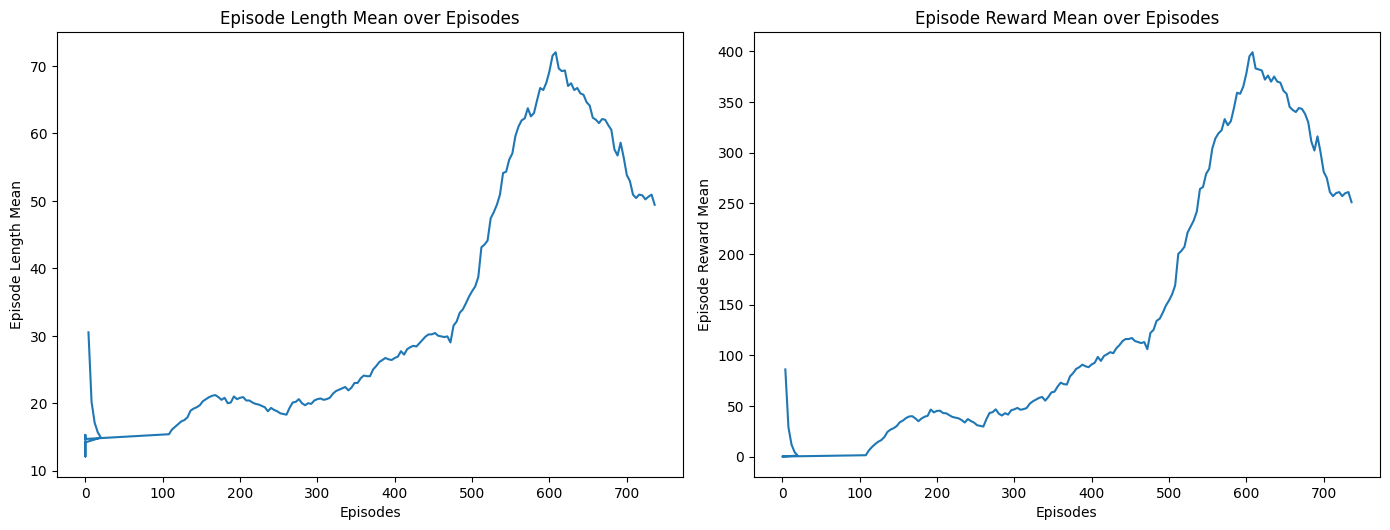

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a DataFrame
columns = ["ep_len_mean", "ep_rew_mean", "exploration_rate", "episodes", "fps","time_elapsed", "total_timesteps", "learning_rate", "loss", "n_updates"]
df = pd.DataFrame(data, columns=columns)

# Plotting
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(df["episodes"], df["ep_len_mean"])
plt.title("Episode Length Mean over Episodes")
plt.xlabel("Episodes")
plt.ylabel("Episode Length Mean")

plt.subplot(2, 2, 2)
plt.plot(df["episodes"], df["ep_rew_mean"])
plt.title("Episode Reward Mean over Episodes")
plt.xlabel("Episodes")
plt.ylabel("Episode Reward Mean")

# plt.subplot(2, 2, 3)
# plt.plot(df["episodes"], df["loss"])
# plt.title("Loss over Episodes")
# plt.xlabel("Episodes")
# plt.ylabel("Loss")

# plt.subplot(2, 2, 4)
# plt.plot(df["episodes"], df["n_updates"])
# plt.title("Number of Updates over Episodes")
# plt.xlabel("Episodes")
# plt.ylabel("Number of Updates")

plt.tight_layout()
plt.show()

In [4]:
# # Plotting
# plt.figure(figsize=(10, 5))  # Adjusted figure size to match the second plot

# # Scatter plot for the results from the second graph
# log_dir = "lema2024/results/figures/models"
# timesteps = 30000

# # Load results
# results = load_results(log_dir)
# x, y = ts2xy(results, 'timesteps')

# # Filter out data points beyond the specified timesteps
# mask = x <= timesteps
# x, y = x[mask], y[mask]

# # Calculate running average
# window_size = 25  # Adjust the window size for smoothing

# # Initialize the running average array
# y_avg = np.zeros_like(y, dtype=float)
# for i in range(len(y)):
#     y_avg[i] = np.mean(y[max(0, i - window_size + 1):i + 1])

# # Plotting the results from the second graph
# plt.scatter(x, y, alpha=0.3, label='Training Rewards')
# plt.plot(x, y_avg, c='#1f77b4', label='Average Training Reward', linewidth=2)

# # Plot trend line (smoothed average rewards) from the first graph
# plt.plot(model_timesteps, avg_rewards, marker='o', color='orange', label='Average Validation Reward')

# plt.xlabel('Timesteps')
# plt.ylabel('Reward')
# plt.title('Combined Training Performance Comparison')
# plt.grid(True)
# plt.legend()
# plt.xlim(0, 5500)  # Set x-axis limits to match the second plot
# plt.ylim(-200, 500)  # Set y-axis limits to match the second plot
# plt.tight_layout()  # Adjust layout to prevent overlapping labels
# plt.show()